# US Flights Data Exploration

## Preliminary Wrangling

**This document explores a dataset containing US flights in January 2019 and attributes for approximately 583985 flights.**

In [1]:
# import all needed libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# reading data from the file
df_main = pd.read_csv("flights.csv")

In [3]:
df_main.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,...,CANCELLATION_CODE,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2019,1,1,6,7,2019-01-06,10397,ATL,11150,CSG,...,NaN,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,7,1,2019-01-07,10397,ATL,11150,CSG,...,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,8,2,2019-01-08,10397,ATL,11150,CSG,...,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,9,3,2019-01-09,10397,ATL,11150,CSG,...,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,10,4,2019-01-10,10397,ATL,11150,CSG,...,NaN,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking data types and null values
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 583985 non-null  int64  
 1   QUARTER              583985 non-null  int64  
 2   MONTH                583985 non-null  int64  
 3   DAY_OF_MONTH         583985 non-null  int64  
 4   DAY_OF_WEEK          583985 non-null  int64  
 5   FL_DATE              583985 non-null  object 
 6   ORIGIN_AIRPORT_ID    583985 non-null  int64  
 7   ORIGIN               583985 non-null  object 
 8   DEST_AIRPORT_ID      583985 non-null  int64  
 9   DEST                 583985 non-null  object 
 10  DEP_DELAY            567630 non-null  float64
 11  ARR_DELAY            565963 non-null  float64
 12  CANCELLED            583985 non-null  float64
 13  CANCELLATION_CODE    16726 non-null   object 
 14  DIVERTED             583985 non-null  float64
 15  AIR_TIME         

In [5]:
# changing column names to lower case
df_main.columns = df_main.columns.str.lower()

In [6]:
# summary of the first 15 columns
df_main[df_main.columns[:15]].describe()

,year,quarter,month,day_of_month,day_of_week,origin_airport_id,dest_airport_id,dep_delay,arr_delay,cancelled,diverted
count,583985.0,583985.0,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,567630.000000,565963.000000,583985.000000,583985.000000
mean,2019.0,1.0,1.0,15.960088,3.835626,12659.701982,12659.470015,9.766091,4.257506,0.028641,0.002219
std,0.0,0.0,0.0,8.987942,1.921899,1519.405493,1519.336466,48.626941,51.159511,0.166796,0.047056
min,2019.0,1.0,1.0,1.000000,1.000000,10135.000000,10135.000000,-47.000000,-85.000000,0.000000,0.000000
25%,2019.0,1.0,1.0,8.000000,2.000000,11292.000000,11292.000000,-6.000000,-16.000000,0.000000,0.000000
50%,2019.0,1.0,1.0,16.000000,4.000000,12889.000000,12889.000000,-3.000000,-7.000000,0.000000,0.000000
75%,2019.0,1.0,1.0,24.000000,5.000000,13931.000000,13931.000000,5.000000,7.000000,0.000000,0.000000
max,2019.0,1.0,1.0,31.000000,7.000000,16218.000000,16218.000000,1651.000000,1638.000000,1.000000,1.000000


In [7]:
# summary of the remaining of columns
df_main[df_main.columns[15:]].describe()

,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 22
count,565963.000000,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000,0.0
mean,112.694461,797.742767,20.106080,4.428551,18.508392,0.079508,24.950590,NaN
std,71.195757,589.999261,65.762202,38.535323,41.726392,3.203342,50.851973,NaN
min,4.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,61.000000,363.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,94.000000,640.000000,0.000000,0.000000,5.000000,0.000000,0.000000,NaN
75%,143.000000,1037.000000,16.000000,0.000000,21.000000,0.000000,29.000000,NaN
max,691.000000,4983.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000,NaN


### converting data into right types
- year, quarter, month, day_of_month, day_of_week should be catgories
- op_carrier_fl_num, origin_airport_id, dest_airport_id should be catgories
- fl_date should be datetime and should be made as index to be useful in analysis


In [8]:
# converting wrong data type to the right data type
lst_catgs = ['origin_airport_id', 'dest_airport_id', 'cancellation_code']
for col in lst_catgs:
    df_main[col] = df_main[col].astype('category')

# dropping unncessary columns
df_main.drop(['day_of_month','year', 'quarter', 'month','unnamed: 22'],axis=1, inplace=True)

# checking changes
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   day_of_week          583985 non-null  int64   
 1   fl_date              583985 non-null  object  
 2   origin_airport_id    583985 non-null  category
 3   origin               583985 non-null  object  
 4   dest_airport_id      583985 non-null  category
 5   dest                 583985 non-null  object  
 6   dep_delay            567630 non-null  float64 
 7   arr_delay            565963 non-null  float64 
 8   cancelled            583985 non-null  float64 
 9   cancellation_code    16726 non-null   category
 10  diverted             583985 non-null  float64 
 11  air_time             565963 non-null  float64 
 12  distance             583985 non-null  float64 
 13  carrier_delay        105222 non-null  float64 
 14  weather_delay        105222 non-null  float64 
 15  

In [9]:
# fixing the index to be useful in our analysis
df_main["fl_date"] = pd.to_datetime(df_main.fl_date)
df_main.set_index('fl_date', inplace=True)

In [10]:
# checking the index
df_main.head()

,day_of_week,origin_airport_id,origin,dest_airport_id,dest,dep_delay,arr_delay,cancelled,cancellation_code,diverted,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
fl_date,,,,,,,,,,,,,,,,,
2019-01-06,7,10397,ATL,11150,CSG,-2.0,-12.0,0.0,NaN,0.0,18.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-07,1,10397,ATL,11150,CSG,-5.0,-20.0,0.0,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-08,2,10397,ATL,11150,CSG,-5.0,-13.0,0.0,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-09,3,10397,ATL,11150,CSG,-5.0,-15.0,0.0,NaN,0.0,19.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-01-10,4,10397,ATL,11150,CSG,-5.0,-11.0,0.0,NaN,0.0,21.0,83.0,NaN,NaN,NaN,NaN,NaN


### In our data we have origin and destination airports, however they do not make sense as only shortcuts are used.
- we should find a way to convert them into meaningful names
----
#### After searching the internet, there is a website offers full names for all airport shortcuts and we will try to scrap it and use it in our data

In [11]:
# a website that have most of US airports codes
url = 'https://www.prokerala.com/travel/airports/united-states-of-america/'

# read the content
codes_page = requests.get(url).content

# extract text with beautiful soup
page_text = BeautifulSoup(codes_page,'lxml')

# append the all items in tables of the page to a list
lst_codes = []
for i in page_text.find_all('table'):
    for j in i.find_all('td'):
        lst_codes.append(j.text)

In [12]:
# cleaning the list 
new_lst= []
ap_codes = {}

# appending only the code and the airport full name
for i in lst_codes:
    if len(i) >= 3 and len(i) != 4:
        new_lst.append(i)

# filtering the list from any numbers
new_lst_clean = []
for x in new_lst:
    if re.search('[0-9]{3}',x)==None:
        new_lst_clean.append(str(x).replace('\n',' ').strip())
        
# checking the new list
new_lst_clean[0:20]

['A L Mangham Jr. Regional Airport  Nacogdoches, TX',
 'OCH',
 'AAF Heliport Airport  Fort Devens',
 'AYE',
 'Acadiana Regional Airport  New Iberia',
 'ARA',
 'Accomack County Airport  Melfa',
 'MFV',
 'Adak Island Ns Airport  Adak Island',
 'ADK',
 'Adams Field Airport  Little Rock, AR',
 'LIT',
 'Addison Airport  Dallas',
 'ADS',
 'Adirondack Airport  Saranac Lake',
 'SLK',
 'Af Aux Airport  Indian Springs',
 'INS',
 'AFB Airport  Homestead',
 'HST']

In [13]:
# creating a dictionary of codes and airports full names
ap_codes = {}
for i in range(0,len(new_lst_clean),2):
    ap_codes[new_lst_clean[i+1]] = new_lst_clean[i]
    

In [14]:
# checking the dictionary
list(ap_codes.items())[0:10]

[('OCH', 'A L Mangham Jr. Regional Airport  Nacogdoches, TX'),
 ('AYE', 'AAF Heliport Airport  Fort Devens'),
 ('ARA', 'Acadiana Regional Airport  New Iberia'),
 ('MFV', 'Accomack County Airport  Melfa'),
 ('ADK', 'Adak Island Ns Airport  Adak Island'),
 ('LIT', 'Adams Field Airport  Little Rock, AR'),
 ('ADS', 'Addison Airport  Dallas'),
 ('SLK', 'Adirondack Airport  Saranac Lake'),
 ('INS', 'Af Aux Airport  Indian Springs'),
 ('HST', 'AFB Airport  Homestead')]

#### After extracting the reports in ready dictionary to be added for our operation we should check if we have all the airports shortcuts/codes

In [15]:
# checking if we have all codes in our dicitionary
df_main.loc[df_main.origin.isin(ap_codes.keys())==False, 'origin'].unique()

array(['CSG', 'ECP', 'SJU', 'AZA', 'USA', 'BQN', 'PSE', 'STT', 'STX',
       'GUM', 'SPN', 'TXK', 'PPG'], dtype=object)

In [16]:
df_main.loc[df_main.dest.isin(ap_codes.keys())==False, 'dest'].unique()

array(['CSG', 'SJU', 'ECP', 'USA', 'AZA', 'BQN', 'PSE', 'STT', 'STX',
       'GUM', 'SPN', 'TXK', 'PPG'], dtype=object)

#### We see that there are some missing values in both origin and dest we will search for them

In [17]:
# list of missing codes and their full name
missing_ap = {
    'CSG':'Columbus Metropolitan Airport',
    'ECP':"Northwest Florida Beaches International Airport",
    'SJU':"Luis Muñoz Marín International Airport",
    'AZA':"Phoenix-Mesa Gateway Airport",
    'USA':"Concord Regional Airport",
    'BQN':"Rafael Hernández International Airport",
    'PSE':"Mercedita International Airport",
    'STT':"Cyril E. King Airport",
    'STX':"Henry E. Rohlsen Airport",
    'GUM':"Antonio B. Won Pat International Airport",
    'SPN':"Saipan International Airport",
    'TXK':"Texarkana Regional Airport",
    'PPG':"Pago Pago International Airport"
}

In [18]:
# appending the missing codes to the main dicitonary of codes
for i in missing_ap.keys():
    ap_codes[i] = missing_ap[i]

In [19]:
# now we check again
df_main.loc[df_main.dest.isin(ap_codes.keys())==False, 'dest'].unique(), df_main.loc[df_main.origin.isin(ap_codes.keys())==False, 'origin'].unique()

(array([], dtype=object), array([], dtype=object))

In [20]:
# in order to keep our dictionary we can save it in csv format
df_airports_names = pd.DataFrame(ap_codes.items(), columns=["airport_code","airport_full_name"])
df_airports_names.to_csv("US_airports_names_codes.csv")

In [21]:
# we set the airport code as index to make merge easy
df_airports_names.set_index('airport_code',inplace=True)
df_airports_names.head()

,airport_full_name
airport_code,
OCH,"A L Mangham Jr. Regional Airport Nacogdoches, TX"
AYE,AAF Heliport Airport Fort Devens
ARA,Acadiana Regional Airport New Iberia
MFV,Accomack County Airport Melfa
ADK,Adak Island Ns Airport Adak Island


In [22]:
# setting the day of week with the day name from our datetime index to amenaingful value
df_main["day_of_week"] = df_main.index.day_name()

## **Univariate Plots**

### Most frequent day of the week

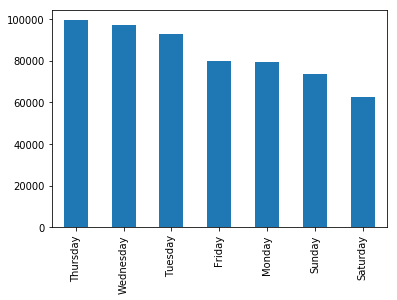

In [58]:
# counting the repition of records for each day
df_main["day_of_week"].value_counts().plot(kind='bar')

**We notice that thursday is most day with flights and saturday is the lowest**

### The top 10 airports with most flights for departure

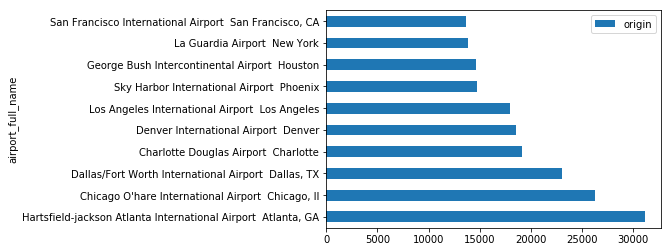

In [24]:
# counting the number of records for the top 10 airports of origin
pd.merge(pd.DataFrame(df_main['origin'].value_counts())[0:10], df_airports_names, how='left', left_index=True,right_index=True).plot(x='airport_full_name',y='origin',kind='barh')

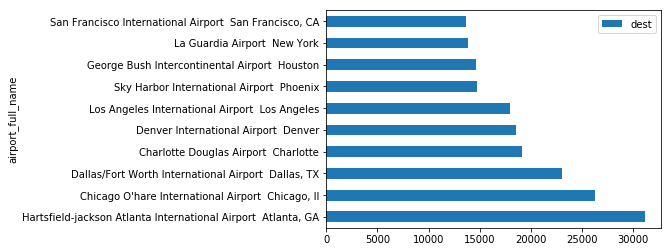

In [25]:
# counting the number of records for the top 10 airports of destination
pd.merge(pd.DataFrame(df_main['dest'].value_counts())[0:10], df_airports_names, how='left', left_index=True,right_index=True).plot(x='airport_full_name',y='dest',kind='barh')

**we see that both destination and origin airports are the same in both**

### Departure and Arrival delays

In [26]:
df_main['dep_delay'].describe()

count    567630.000000
mean          9.766091
std          48.626941
min         -47.000000
25%          -6.000000
50%          -3.000000
75%           5.000000
max        1651.000000
Name: dep_delay, dtype: float64

([<matplotlib.axis.YTick at 0x28fce30e9b0>,
 <a list of 3 Text yticklabel objects>)

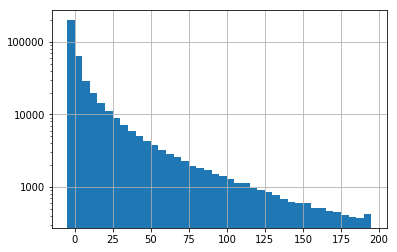

In [27]:
# checking the departure delay
bins0 = np.arange(-5,200,5)
df_main['dep_delay'].hist(bins=bins0)
plt.yscale('log')
plt.yticks([1000,10000,100000],[1000,10000,100000])

**We can notice that departure delay is centered before zero, which may indicate that the flights depart before the scheduled time** 

In [28]:
df_main['arr_delay'].describe()

count    565963.000000
mean          4.257506
std          51.159511
min         -85.000000
25%         -16.000000
50%          -7.000000
75%           7.000000
max        1638.000000
Name: arr_delay, dtype: float64

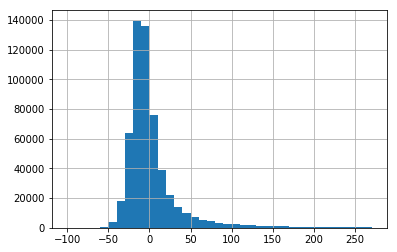

In [29]:
# checking arrival delays
bins=np.arange(-100,280,10)
df_main['arr_delay'].hist(bins=bins)

**We can notice that departure delay is centered before zero, which may indicate that the flights arrive before the scheduled time**

In [30]:
df_main['distance'].describe()

count    583985.000000
mean        797.742767
std         589.999261
min          31.000000
25%         363.000000
50%         640.000000
75%        1037.000000
max        4983.000000
Name: distance, dtype: float64

### Distance between airports

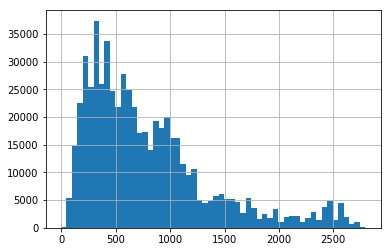

In [31]:
# checking the distance
bns = np.arange(-5,2800,50)
df_main['distance'].hist(bins=bns)

**We notice that distance is right skewwed and most the flights do not exceed 1000 miles**

### Different types of delays

In [32]:
df_main['carrier_delay'].describe()

count    105222.000000
mean         20.106080
std          65.762202
min           0.000000
25%           0.000000
50%           0.000000
75%          16.000000
max        1638.000000
Name: carrier_delay, dtype: float64

(0, 10000)

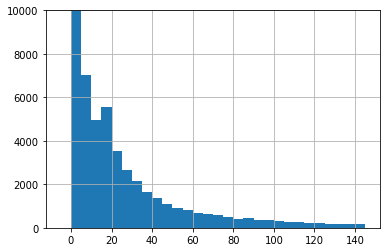

In [33]:
# checking the carier delay
bins2 = np.arange(-5,150,5)
df_main['carrier_delay'].hist(bins=bins2)
plt.ylim(0,10000)

In [34]:
df_main['weather_delay'].describe()

count    105222.000000
mean          4.428551
std          38.535323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1416.000000
Name: weather_delay, dtype: float64

(0, 1500)

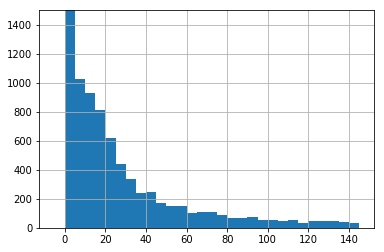

In [35]:
# checking the weather delays
bins3 = np.arange(-5,150,5)
df_main['weather_delay'].hist(bins=bins3)
plt.ylim(0,1500)

In [36]:
df_main['nas_delay'].describe()

count    105222.000000
mean         18.508392
std          41.726392
min           0.000000
25%           0.000000
50%           5.000000
75%          21.000000
max        1447.000000
Name: nas_delay, dtype: float64

(0, 15000)

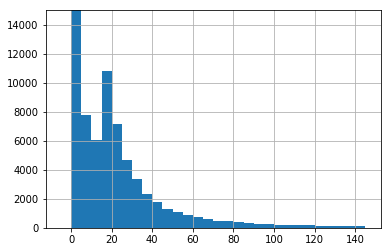

In [37]:
# checking the nas delays
bins4 = np.arange(-5,150,5)
df_main['nas_delay'].hist(bins=bins4)
plt.ylim(0,15000)

In [38]:
df_main['security_delay'].describe()

count    105222.000000
mean          0.079508
std           3.203342
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         816.000000
Name: security_delay, dtype: float64

(0, 75)

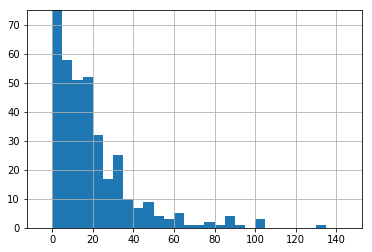

In [39]:
# checking the security delays
bins5 = np.arange(-5,150,5)
df_main['security_delay'].hist(bins=bins5)
plt.ylim(0,75)

In [40]:
df_main['late_aircraft_delay'].describe()

count    105222.000000
mean         24.950590
std          50.851973
min           0.000000
25%           0.000000
50%           0.000000
75%          29.000000
max        1514.000000
Name: late_aircraft_delay, dtype: float64

(0, 10000)

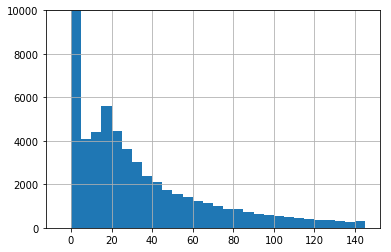

In [41]:
# checking the late aircraft delays
bins6 = np.arange(-5,150,5)
df_main['late_aircraft_delay'].hist(bins=bins6)
plt.ylim(0,10000)

### We notice that weather delay has the highest average

In [42]:
# checking the cancellation code
df_main["cancellation_code"].unique()

[NaN, B, C, A, D]
Categories (4, object): [B, C, A, D]

cancellation code does not make sense, it should be converted to the original form

In [43]:
# creating dictionary for replacement of cancellation codes
cancel_codes = {'A':'Carrier',
                'B':'Weather',
                'C':'National Air System',
                'D':'Security'}

In [44]:
# replacing the cancellation code in the dataframe
df_main["cancellation_code"] = df_main["cancellation_code"].replace(cancel_codes,)

### The most frequent delay type

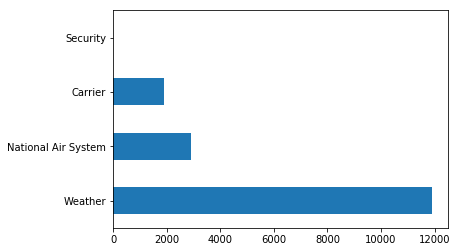

In [45]:
# checking the most frequent cancellation reason
df_main["cancellation_code"].value_counts().plot(kind='barh')

### The most frequent delay type is weather and rearest is security delay.

### Average delay in mintues for each type of delay

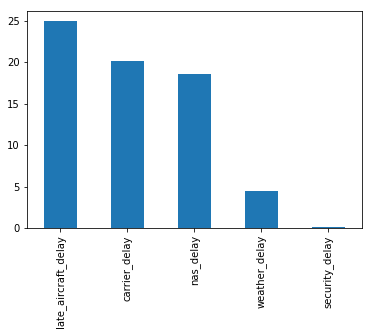

In [46]:
# checking the average delays for delays columns
df_main[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']].mean().sort_values(ascending=False).plot(kind='bar')

## **Bivariate Plots**

### The relation between the departure delay and distance

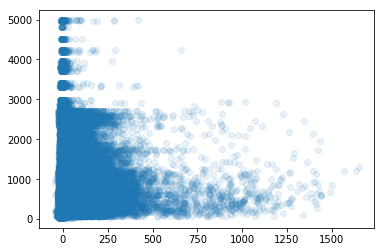

In [47]:
# checking the relation between the departure delay and distance
plt.scatter(df_main["dep_delay"],df_main["distance"], alpha=0.1)

### The relation between the arrival delay and distance

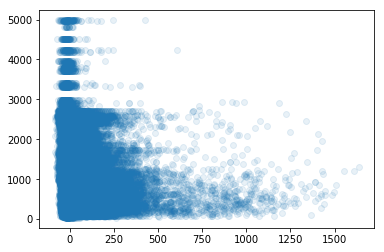

In [48]:
# checking the relation between the arrival delay and distance
plt.scatter(df_main["arr_delay"],df_main["distance"], alpha=0.1)

#### We notice similar trend in both types of delays

### The average departure and arrival delay throughout the month

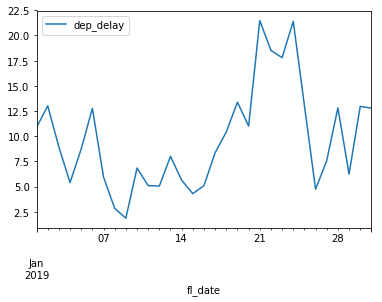

In [49]:
# checking the average departure delay throughout the month
df_main[["dep_delay"]].resample("d").mean().plot()

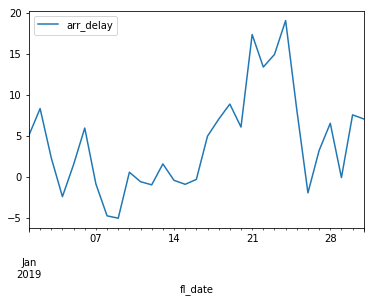

In [50]:
# checking the average arrival delay throughout the month
df_main[["arr_delay"]].resample("d").mean().plot()

#### We notice similar performance in both arrival and departure delays throughtout the month. The peak is between 21 and 25. This may indicate a relationship between departure and arrival delays

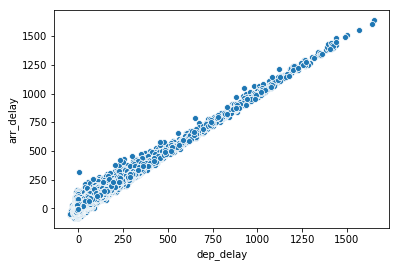

In [51]:
# checking the relation between departure delay and arrival delay
sns.scatterplot(x='dep_delay',y='arr_delay',data=df_main) # faster than regplot/lmplot

#### As expected from the previous plot that there is a strong direct relationship between departure and arrival delay.

### The most day of the week that we have the highest air time.

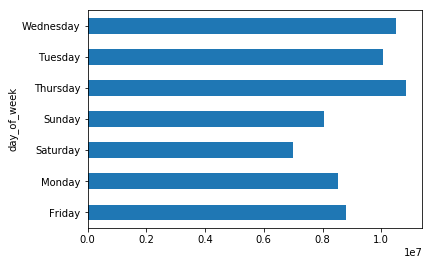

In [52]:
# checking the most day with air time
df_main.groupby('day_of_week')['air_time'].sum().plot(kind='barh')

#### we can see that the peak is on Thursday and the lowest is on Saturday.  It may also indicate that we have more flights or longer flights.

## **Multivariate plots**

### The relation between departur delay and arrival delay and the day of the week

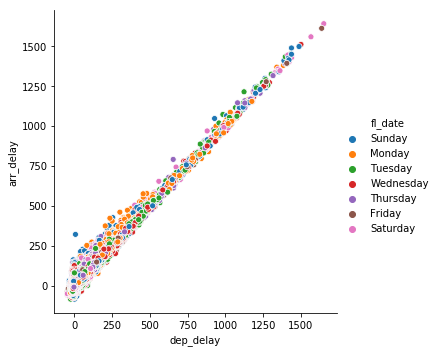

In [53]:
# checking the most day the delays happen in it
sns.relplot(x='dep_delay',y='arr_delay',data=df_main, hue=df_main.index.day_name())

#### The plot we have here shows the coorelation but there are much data, we can try a better approach

#### We can use facet grid plot to show each day of the week

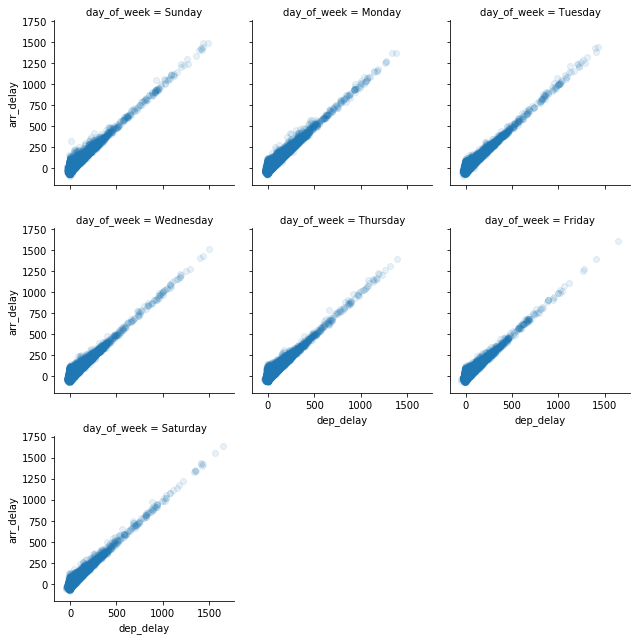

In [54]:
# digging depper as the scatter plot does not show the full picture
g = sns.FacetGrid(df_main, col='day_of_week',col_wrap=3)
g.map(plt.scatter,'dep_delay','arr_delay', alpha=0.1)

#### We still have the same problem that there is no conclusion because they are mostly similar no specific trend

#### We will try the same using a differrent type

C:\Users\g_rimoun\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

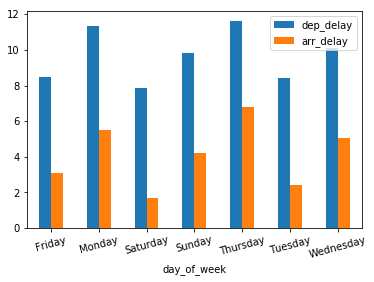

In [55]:
# checking which day that have more departure and arrival delays
df_main.groupby('day_of_week')['dep_delay','arr_delay'].mean().plot(kind='bar')
plt.xticks(rotation=15)

#### Now we can make better observations and clear opinion about the heights and lowest delay average in the week

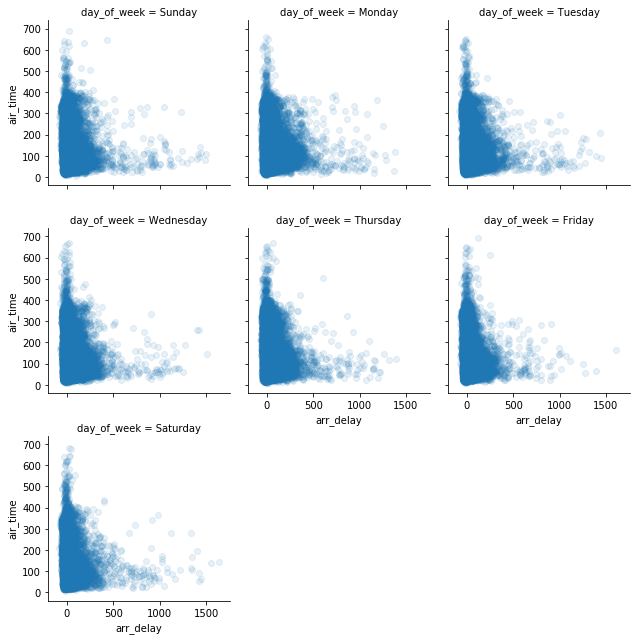

In [56]:
# checking the relation between day of week, arrival delay and air time
g = sns.FacetGrid(df_main, col='day_of_week',col_wrap=3)
g.map(plt.scatter,'arr_delay','air_time', alpha=0.1)

### The percentage of cancelled and diverted flights each week

C:\Users\g_rimoun\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


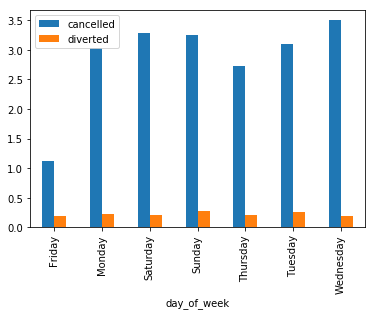

In [57]:
# checking which day has the highest cancellation and dirversion rate
(df_main.groupby('day_of_week')["cancelled",'diverted'].mean() *100).plot(kind='bar')

#### Wednesday has the highest average cancellations than other days, however diversion may remain mostly similar accept sunday its little bit more

In [59]:
df_main.to_csv('flights_cleaned.csv')

## Main findings

- Thursday is very busy and crowded day.
- The most frequent cancellations happen because of the weather.
- The average delays has its peak on Thursday which may indicate the longer flights having troubles with weather tend to be late more than short distance flights.
- The second half of the month witnesses higher delays than the first half.
- The air time is at its highest on Thursday, however we notice more cancellations of Wednesday than Thursday. This may indicate that people who is their flights were cancelled on Wednesday took alternative flights on Thursday or just a normal thing and there is no relation.